## Introduction

### Tensors
Tensors are `multidimensional arrays` (an extension of two-dimensional matrices). This is used to represent the data with the higher dimensions. Tensor's dimensionality is described by a unit of dimensionality called `rank`. Scalars are considered as Tensor of rank-0, Vectors as Tensor of rank-1 and Matrices as Tensor of rank-2. Tensorflow programs use a tensor data structure to represent all data.

### Tensor Data Types
In addition to dimensionality, tensors have different types as well. Following are the data types:
> DT_INT8 ~ tf.int8 ~ 8 bits signed integer. <br>
  DT_INT16 ~ tf.int16 ~ 16 bits signed integer. <br>
  DT_INT32 ~ tf.int32 ~ 32 bits signed integer. <br>
  DT_INT64 ~ tf.int64 ~ 64 bits signed integer. <br>
  DF_UINT8 ~ tf.uint8 ~ 8 bits unsigned integer. <br>
  DF_FLOAT16 ~ tf.float16 ~ 16 bits floating point. <br>
  DF_FLOAT32 ~ tf.float32 ~ 32 bits floating point. <br>
  DF_DOUBLE ~ tf.float64 ~ 64 bits floating point. <br>
  DT_STRING ~ tf.stirng ~ Variable length byte array. Each element of a tensor is a byte array. <br>
  DT_BOOL ~ tf.bool ~ Boolean. 

In tensorflow we don't need to specify the tensor type, but if we want to reserve the memory for the tensor beforehand the type can be specified. <br>

### TensorFlow
- TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.


- In TensorFlow, computation is approached as a `dataflow graph`. In this graphs, the node represents the operation and the connecting edges represent the tensors that are being passed to a certain operation.


- Tensorflow define a general purpose `computation graph`.
    - Achieves ease of expression.


- Create tools for running in different environments.
    - Achieves portability, scalability, reproductivity and production-readiness.

### TensorFlow Architecture

- Tensorflow has a `Tensorflow Distributed Execution Engine`which takes the code from different languages like Python, C++, etc (as a Front-end) and creates the instuction set (at the Back-end) for the hardware we need like - CPU, GPU, Android, iOS, etc. <br> <br>
    - The Estimators API was added to Tensorflow in Release 1.1, and provides a high-level abstraction over lower-level Tensorflow core operations. It works with an Estimator instance, which is TensorFlow's high-level representation of a complete model. <br> <br>
    - Keras is similar to the Estimators API in that it abstracts deep learning model components such as layers, activation functions and optimizers, to make it easier for developers. It is a model-level library, and does not handle low-level operations, which is the job of tensor manipulation libraries, or backends. Keras supports three backends - Tensorflow, Theano and CNTK. Keras was not part of Tensorflow until Release 1.4.0 (2 Nov 2017). Now, when you use tf.keras (or talk about 'Tensorflow Keras'), you are simply using the Keras interface with the Tensorflow backend to build and train your model. <br>


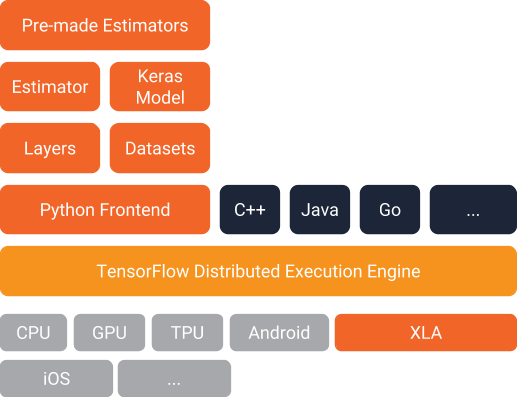 <br> <br>


- So both the Estimator API and Keras API provides a high-level API over low-level core Tensorflow API, and you can use either to train your model. But in most cases, if you are working with Tensorflow, you'd want to use the Estimators API for the reasons listed below:
    - **Distribution** <br>
    You can conduct distributed training across multiple servers with the Estimators API, but not with Keras API. You can run Estimator-based models on a local host or on a distributed multi-server environment without changing your model. Furthermore, you can run Estimator-based models on CPUs, GPUs, or TPUs without recoding your model.
    - **Pre-made Estimator** <br>
    Whilst Keras provides abstractions that makes building your models easier, you still have to write code to build your model. With Estimators, Tensorflow provides Pre-made Estimators, which are models which you can use straight away, simply by plugging in the hyperparameters.
    - **Integration with Other Tensorflow Tools** <br>
    Tensorflow provides a vistualzation tool called TensorBoard that helps you visualize your graph and statistics. By using an Estimator, you can easily save summaries to be visualized with Tensorboard.
    - **Converting Keras Model to Estimator** <br>
    To migrate a Keras model to an Estimator, use the tf.keras.estimator.model_to_estimator method.

 - The TensorFlow runtime is a cross-platform library. Belowfigure illustrates it's general architecture. A `C-API` separates user level code in different languages from the core runtime. As we know, we write code in different languages (front-end) which then gets executed by the TensorFlow Distributed Execution Engine which is C-API using a session.
 
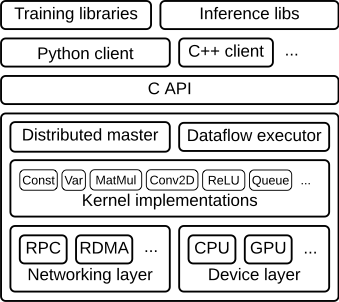

- Tensorflow handles the `complexity of distributed system`. We just have to specify the data flow graph and the structure of system (rather doing the process in some distributed manner by ourself). All the scheduling across the devices are handled by the tensorflow.


- In tensorflow, first it layout the data-flow graph (computation graph) and then executes it. 
    - Advantage: We got our dataflow graph and then tensorflow can parallelize our work by deciding which operation is to be done by which (CPU or GPU or both doing different tasks or some other resources) and when. So, the tensorflow communicates between two different devices on its own with the help of `send-receive nodes`.
    
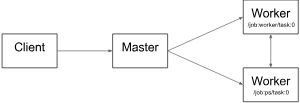

### TensorFlow Code
Tensorflow code programs consists of two discrete sections:


- **Building a computational graph** <br>
  A computational graph is a series of TensorFlow operations arranged into a graph of nodes. Here, it doesn't evaluate any value and just define the flow of operations that is specified in our code. When we execute it, we get just an abstract tensor (tensor object) holding the information of computation.


- **Running a computational graph** <br>
  In order to see the results, we need to run the `Session`. So what we do is first we make the graph first (as in the above step) and then launch the graph (as in this step). Session allow us to execute the graph or a part of the graph.


### Session
 A Session is class for running tensorflow operations. A Session object (sess in our case) `encapsulates` the environment (`control` and `state` of the TensorFlow runtime) in which the Operation objects are executed and Tensor objects are evaluated. <br>

**control:** A TensorFlow graph is a description of computations. To compute anything, a graph must be launched in a Session which control the flow of execution as described in the computation graph. <br>
**state:** A Session places the graph operations onto Devices, such as CPUs or GPUs, and provides methods to execute them. These methods return tensors produced by operations as numpy ndarray objects in Python, and as tensorflow::Tensor instances in C and C++. <br>

A session may own resources, such as tf.Variable, tf.QueueBase, and tf.ReaderBase,etc. It is important to release these resources when they are no longer required. To do this, we have to either invoke the `tf.Session.close` method on the session or use the session as a `context manager`.

In [11]:
# Importing TensorFlow
import tensorflow as tf

In [23]:
# Building a computational graph
node1 = tf.constant(3.0, tf.float16)  # implicitly taken as tf.float16
node2 = tf.constant(4.0)   # by default takes the tf.float32
print(node1, node2)

Tensor("Const_20:0", shape=(), dtype=float16) Tensor("Const_21:0", shape=(), dtype=float32)


In [11]:
# Executing the computational graph using Session object
sess = tf.Session()
print(sess.run([node1, node2]))
sess.close()   # we need to close the session to free out the resources

[3.0, 4.0]


In [8]:
# Executing the computational graph using Context Manager

# Method-1
with tf.Session() as sess:
    print(sess.run([node1, node2]))

# Method-2
with tf.Session():
    print([node1.eval(), node2.eval()]) # we can use eval() method in a session context which is equivalent to the 
                                        #sess.run(node1)

NameError: name 'node1' is not defined

### Inside a Context Manager

In [9]:
# Example code
x = tf.Variable(3, name='x')
y = tf.Variable(4, name='y')
f = x*x*y + y + 2

with tf.Session() as sess:
    sess.run(x.initializer)
    sess.run(y.initializer)
    result = f.eval()

print(result)

42


**Explanation**<br>
Inside the with block, the session is set as the default session. Calling x.initializer.run() is
equivalent to calling tf.get_default_session().run(x.initializer), and similarly f.eval() is
equivalent to calling tf.get_default_session().run(f). This makes the code easier to read.
Moreover, the session is automatically closed at the end of the block.

In [22]:
# Performing the operation
a = tf.constant(5.0)
b = tf.constant(4.0)
c = tf.multiply(a, b)  # we can do the operations like - multiply, etc. using the tensorflow operation functions
d = a * b  # multiply operator is overloaded for ease of use.

sess = tf.Session()
print(sess.run([c, d]))
sess.close()

[20.0, 20.0]


### TensorBoard
- For visualizing the Computaional (TensorFlow) graphs, we use TensorBoard.
- TensorBoard is a suite of Web Applications for understanding your computational graphs. For that what we need to do is to create an object for writting summaries. One such class is called `FileWriter`.
- The first argument when creating the FileWriter is an output `directory name`, which will be created if it doesn't exist and stores the information.
- The second argument is the graph.

The next thing to do is execute the command `tensorboard --logdir = "path_to_the_graph"` in the command line and we will see that the tensoreboard will run as a web app locally.

### Types of Node

- **constant:** It takes no inputs and it outputs a value it stores internally. It is defined using `tf.constant()`, where first argument takes the value and second argument takes the explicit tensor data-type (optional). 


- **placeholder:** A graph can be parameterized to accept external inputs, known as paceholders. A placeholder is a promise to provide a value later. For this we have to specify the tensor data-type beforehand. It is defined using `tf.placeholder()`, where first argument takes the tensor data-type of the placeholder.


- **Variable:** To make a model trainable, we need to be able to modify the graph to get new outputs with the same input. Variable allow us to add trainable parameters (tensors whose value can be changed whenever we want) to a graph. We can make a variable tensor using `tf.Variable()` which takes the first argument as a initial-value and second argument as a explicit tensor data-type (optional). Unlike constant and placeholders, to initialize all the variables in a TensorFlow program, you must explicitly call a special operation - `tf.global_varaibles_initializer()` which will add an initialisation operation. This operation should be passed in sess.run() before evaluating any computation related to these variables.

In [6]:
# Performing the operation
a = tf.constant(5.0)
b = tf.constant(4.0)
c = tf.multiply(a, b)  # we can do the operations like - multiply, etc. using the tensorflow operation functions
d = a * b  # multiply operator is overloaded for ease of use.

sess = tf.Session()
File_Writer = tf.summary.FileWriter('D:\graph', sess.graph)
print(sess.run([c, d]))
sess.close()

[20.0, 20.0]


In [26]:
# Example of constant nodes

node1 = tf.constant(3.0)
node2 = tf.constant(4.0)
print(node1, node2)

Tensor("Const_26:0", shape=(), dtype=float32) Tensor("Const_27:0", shape=(), dtype=float32)


**sess.run()**
- sess.run takes first argument takes the tensors to be execute as a list.
- sess.run takes second argument - feed_dict, which takes a dictionary having the key value as placeholder_name and the dict value as the value to be placed in those placeholders. The dict_value can be a single value or a list of values for which the computation graph will run mulitple times. <br> (In this the list broadcasting takes place, if one list is long and other is short, then the shorter one will replicate over the length of longer one)

In [34]:
# Example of placeholder nodes

import numpy as np
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

inp_a1 = float(input('Enter a1 (float-32 value): '))
inp_b = float(input('Enter b (float-32 value): '))
inp_a2 = float(input('Enter a2 (float-32 value): '))

sess = tf.Session()
print(sess.run(adder_node, {a: [inp_a1, inp_a2], b: [inp_b1]}))
sess.close()

Enter a1 (float-32 value): 3.4
Enter b1 (float-32 value): 4.6
Enter a2 (float-32 value): 5.5
Enter b2 (float-32 value): 6.5
[ 8.  10.1]


In [1]:
# Example of variable nodes (Creating the model)

W = tf.Variable([.3])
b = tf.Variable([-.3])
x = tf.placeholder(tf.float32)

linear_model = W*x + b

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
print(sess.run(linear_model, {x: [1,2,3,4]}))

Instructions for updating:
Colocations handled automatically by placer.
[0.         0.3        0.6        0.90000004]


### Some of the highlights of the Tensorflow
1. It provides a very simple Python API called TF.Learn (tensorflow.contrib.learn), compatible with Scikit-Learn.
2. It also provides another simple API called TF-slom (tensorflow.contrib.slim) to simplify building, training and evaluating neural networks.
3. Several other high-level APIs have been built independently on top of Tensorflow, such as Keras (now available in tensorflow.contrib.keras) or Pretty Tensor.
4. Tensorflow's main python API offers much more flexibility(at the cost of higher complexity) to create all sorts of computations, including any neural network architecture we can think of.
5. It provides seeral advanced optimization nodes to search for the parameters that minimize a cost function. These are very easy to use since TensorFlow automatically takes care of the computing the gradients of the functions we define. This is called **Automatic Differentiating (or autodiff).**
6. Google also launched a cloude service to run TensorFlow graphs.

### Life-cycle of a Node Value
When we evaluate a node, TensorFlow automatically determines the set of nodes that it dependes on and it evaluates these nodes first.

In [13]:
# Example code
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())
    print(z.eval())

10
15


First, this code defines a very simple graph. Then it starts a session and runs the graph to evaluate y: TensorFlow automatically detects that y depends on x, which depends on w, so it first evaluates w, then x, then y, and returns the value of y. Finally, the code runs the graph to evaluate z. Once again, TensorFlow detects that it must first evaluate w and x. It is important to note that it will not reuse the result of the previous evaluation of w and x. In short, the preceding code evaluates w and x twice.

All node values are dropped between graph runs, except variable values, which are maintained by the session across graph runs.A
variable starts its life when its initializer is run, and it ends when the session is closed.

If you want to evaluate y and z efficiently, without evaluating w and x twice as in the previous code, you
must ask TensorFlow to evaluate both y and z in just one graph run, as shown in the following code:

In [15]:
with tf.Session() as sess:
    y_eval, z_eval = sess.run([y, z])
    print(y_eval)
    print(z_eval)

10
15
